# Notebook just for making some publication/presentation ready plots

In [1]:
# Imports
import scipy.interpolate as interp
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import glob
import netCDF4 as nc
import math
import datetime
import xarray as xr
import matplotlib.dates as mdates
import dask.array as da
from erddapy import ERDDAP
from netCDF4 import Dataset
import gsw
import cmocean.cm as cmo
import sys

## To import functions from Slocum-AD2CP GitHub repository, make this path the path to where the repo exists locally
sys.path.insert(0,'/home/jg1200/GitHub/Slocum-AD2CP/src/analysis/')
#sys.path.insert(0,'../src/analysis/')
from analysis import gsw_rho, profile_mld, get_erddap_dataset, grid_glider_data, dist_from_lat_lon

## Set some plotting formats
plt.style.use('seaborn-poster')
myFmtshort = mdates.DateFormatter('%m/%d\n%H:%M')
myFmtlong = mdates.DateFormatter('%m/%d/%y \n%H:%M')
myFmt = mdates.DateFormatter('%m/%d/%y')

## Plot transport time-series from RU29 2020 and RU36 2022 together

In [2]:
df29 = pd.read_csv('/home/jg1200/Data/GliderData/RU29/transport.csv')
df36 = pd.read_csv('/home/jg1200/Data/GliderData/RU36/transport.csv')
df36

Unnamed: 0  transport_u  transport_v
0           0    -1.941463    -0.254457
1           1    -2.084861     0.263643
2           2    -1.623094     0.414784
3           3    -2.694441     0.604203
4           4    -2.367335     0.004448
5           5    -4.097117     0.276387

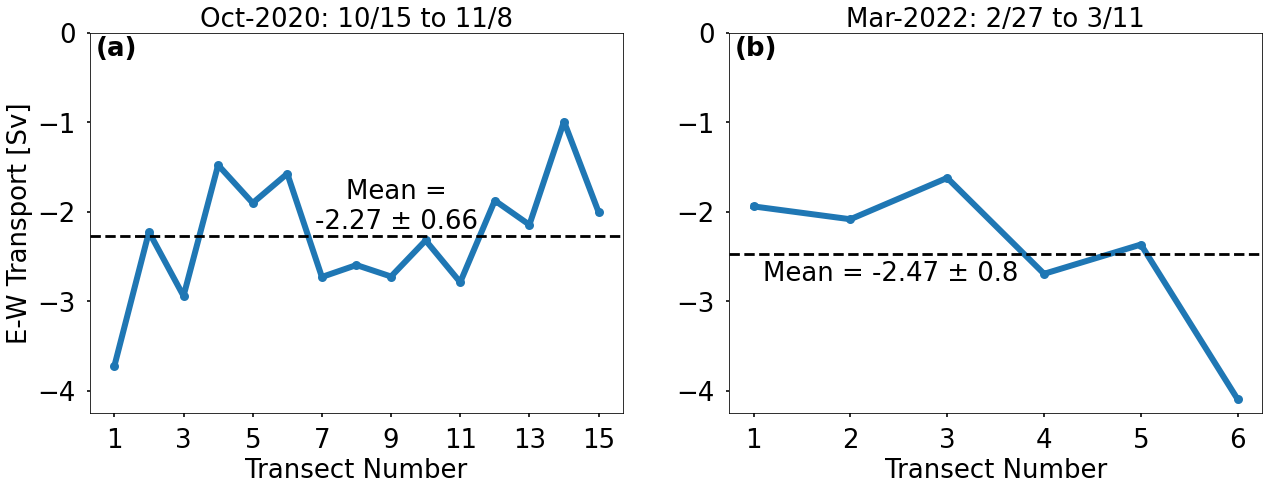

In [3]:
fig, ((ax1,ax2)) = plt.subplots(nrows=1,ncols=2, figsize=(21,7))

axlist = [ax1,ax2]

font_size = 26
title_size = 26
mean_size = 26

ax1.plot(np.arange(1,16),df29.transport_u, linewidth=6,color='tab:blue')
ax1.plot(np.arange(1,16),df29.transport_u, '.',color='tab:blue',markersize=18)
ax1.set_ylabel('E-W Transport [Sv]',fontsize=font_size)
ax1.set_ylim(-4.25,0)
ax1.axhline(y=np.nanmean(df29.transport_u), color='k', linestyle='--')
ax1.text(6.8, np.nanmean(df29.transport_u)+0.08, "Mean =\n%s \u00B1 %s" %(np.round(np.nanmean(df29.transport_u),2),np.round(np.nanstd(df29.transport_u),2)), size=mean_size,multialignment='center');
ax1.set_title('Oct-2020: 10/15 to 11/8',fontsize=title_size)
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.set_xticks(np.arange(1,16,2))
ax1.text(0.01,0.94,'(a)', transform=ax1.transAxes, size=font_size, weight='bold')
ax1.set_xlabel('Transect Number',fontsize=font_size)
ax1.tick_params(axis='both', which='major', labelsize=font_size)


ax2.plot(np.arange(1,7),df36.transport_u, linewidth=6,color='tab:blue')
ax2.plot(np.arange(1,7),df36.transport_u, '.',color='tab:blue',markersize=18)
ax2.axhline(y=np.nanmean(df36.transport_u), color='k', linestyle='--')
ax2.set_ylim(-4.25,0)
ax2.text(1.1, np.nanmean(df36.transport_u)-0.3, "Mean = %s \u00B1 %s" %(np.round(np.nanmean(df36.transport_u),2),np.round(np.nanstd(df36.transport_u),2)), size=mean_size);
ax2.set_title('Mar-2022: 2/27 to 3/11',fontsize=title_size)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_xticks(np.arange(1,7,1))
ax2.text(0.01,0.94,'(b)', transform=ax2.transAxes, size=font_size, weight='bold')
ax2.set_xlabel('Transect Number',fontsize=font_size)
ax2.tick_params(axis='both', which='major', labelsize=font_size)

plt.savefig('/home/jg1200/Figures/RU29_2020_RU36_2022_EW_Transport.png',dpi=300,facecolor='white',bbox_inches='tight')



In [4]:
np.mean(pd.Series.append(df36.transport_u,df29.transport_u,ignore_index=True))

-2.3257662795657095

In [5]:
np.std(pd.Series.append(df36.transport_u,df29.transport_u,ignore_index=True))

0.7071204569953949

Text(0.5, 0, 'Transect Number')

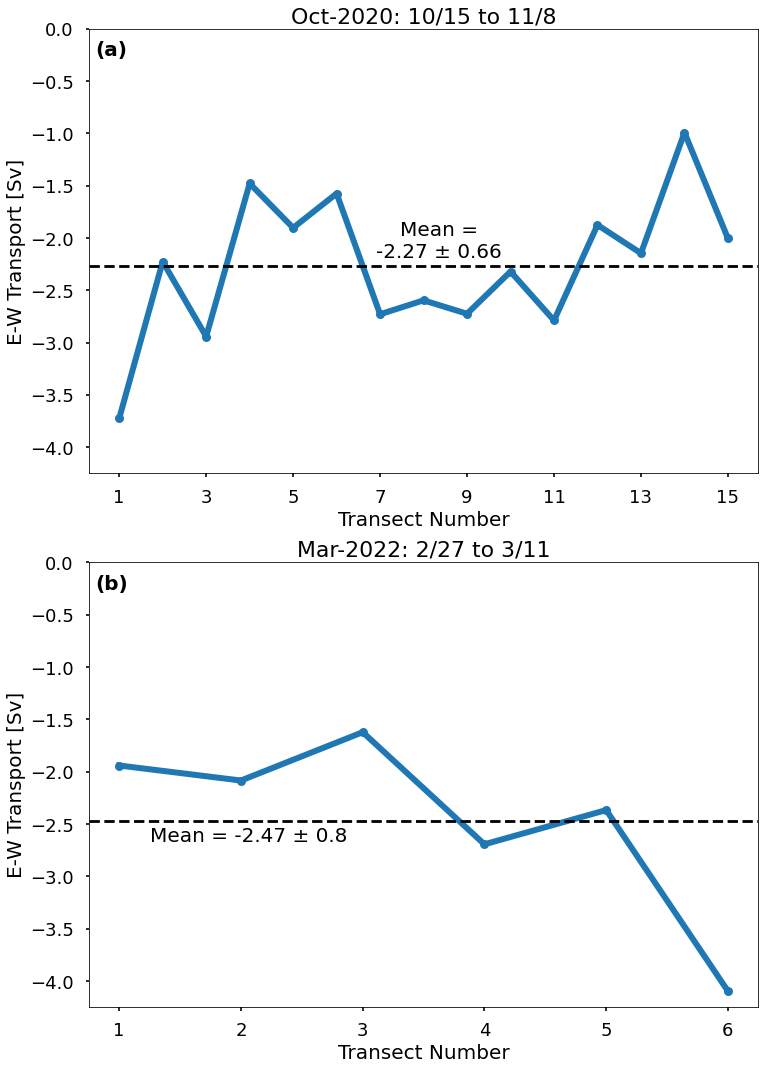

In [6]:
fig, ((ax1,ax2)) = plt.subplots(nrows=2,ncols=1, figsize=(12,18))

axlist = [ax1,ax2]

font_size = 20
title_size = 22
mean_size = 20

ax1.plot(np.arange(1,16),df29.transport_u, linewidth=6,color='tab:blue')
ax1.plot(np.arange(1,16),df29.transport_u, '.',color='tab:blue',markersize=18)
ax1.set_ylabel('E-W Transport [Sv]',fontsize=font_size)
ax1.set_ylim(-4.25,0)
ax1.axhline(y=np.nanmean(df29.transport_u), color='k', linestyle='--')
ax1.text(6.9, np.nanmean(df29.transport_u)+0.08, "Mean =\n%s \u00B1 %s" %(np.round(np.nanmean(df29.transport_u),2),np.round(np.nanstd(df29.transport_u),2)), size=mean_size,multialignment='center');
ax1.set_title('Oct-2020: 10/15 to 11/8',fontsize=title_size)
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.set_xticks(np.arange(1,16,2))
ax1.text(0.01,0.94,'(a)', transform=ax1.transAxes, size=font_size, weight='bold')
ax1.set_xlabel('Transect Number',fontsize=font_size)


ax2.plot(np.arange(1,7),df36.transport_u, linewidth=6,color='tab:blue')
ax2.plot(np.arange(1,7),df36.transport_u, '.',color='tab:blue',markersize=18)
ax2.set_ylabel('E-W Transport [Sv]',fontsize=font_size)
ax2.axhline(y=np.nanmean(df36.transport_u), color='k', linestyle='--')
ax2.set_ylim(-4.25,0)
ax2.text(1.25, np.nanmean(df36.transport_u)-0.2, "Mean = %s \u00B1 %s" %(np.round(np.nanmean(df36.transport_u),2),np.round(np.nanstd(df36.transport_u),2)), size=mean_size);
ax2.set_title('Mar-2022: 2/27 to 3/11',fontsize=title_size)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_xticks(np.arange(1,7,1))
ax2.text(0.01,0.94,'(b)', transform=ax2.transAxes, size=font_size, weight='bold')
ax2.set_xlabel('Transect Number',fontsize=font_size)

#plt.savefig('/home/jg1200/Figures/RU29_2020_RU36_2022_EW_Transport.png',dpi=300,facecolor='white',bbox_inches='tight')



## Plot dominant water masses

In [8]:
## load datasets
grid_ds_2020 = xr.open_dataset("/home/jg1200/Data/GliderData/RU29/RU29_2020_AD2CP_NC/Gridded/RU29_2020_Gridded_ADCP_CTD.nc")
grid_ds_2021a = xr.open_dataset("/home/jg1200/Data/GliderData/RU29/RU29_2021_Mission_1_AD2CP_NC/Gridded/RU29_2021_Mission_1_Gridded_ADCP_CTD.nc")
grid_ds_2021b = xr.open_dataset("/home/jg1200/Data/GliderData/RU29/RU29_2021_Mission_2_AD2CP_NC/Gridded/RU29_2021_Mission_2_Gridded_ADCP_CTD.nc")
grid_ds_2022 = xr.open_dataset("/home/jg1200/Data/GliderData/RU36/RU36_03_2022_ADCP/RU36_03_2022_Gridded_ADCP_CTD.nc")

## subset below surface layer
subset_ds_2020 = grid_ds_2020.where(grid_ds_2020.density >=1024.5)
subset_ds_2021a = grid_ds_2021a.where(grid_ds_2021a.density >=1024.5)
subset_ds_2021b = grid_ds_2021b.where(grid_ds_2021b.density >=1024.5)
subset_ds_2022 = grid_ds_2022.where(grid_ds_2022.density >=1024.5)

## load end-member profiles
df = pd.read_csv('/home/jg1200/Data/naw_saw_endmember_t_s_d_profile.csv')

## indexes for layers for plotting
surface_ind_2020       = np.where(grid_ds_2020.density.values < 1024.5)[0]
salinity_max_ind_2020  = np.where((grid_ds_2020.density.values >= 1024.5) & (grid_ds_2020.density.values < 1026.3))[0]
central_water_ind_2020 = np.where((grid_ds_2020.density.values >= 1026.3) & (grid_ds_2020.density.values < 1027.1))[0]
int_water_ind_2020     = np.where((grid_ds_2020.density.values >= 1027.1))[0]


surface_ind_2021a       = np.where(grid_ds_2021a.density.values < 1024.5)[0]
salinity_max_ind_2021a  = np.where((grid_ds_2021a.density.values >= 1024.5) & (grid_ds_2021a.density.values < 1026.3))[0]
central_water_ind_2021a = np.where((grid_ds_2021a.density.values >= 1026.3) & (grid_ds_2021a.density.values < 1027.1))[0]
int_water_ind_2021a     = np.where((grid_ds_2021a.density.values >= 1027.1))[0]


surface_ind_2021b       = np.where(grid_ds_2021b.density.values < 1024.5)[0]
salinity_max_ind_2021b  = np.where((grid_ds_2021b.density.values >= 1024.5) & (grid_ds_2021b.density.values < 1026.3))[0]
central_water_ind_2021b = np.where((grid_ds_2021b.density.values >= 1026.3) & (grid_ds_2021b.density.values < 1027.1))[0]
int_water_ind_2021b     = np.where((grid_ds_2021b.density.values >= 1027.1))[0]


surface_ind_2022       = np.where(grid_ds_2022.density.values < 1024.5)[0]
salinity_max_ind_2022  = np.where((grid_ds_2022.density.values >= 1024.5) & (grid_ds_2022.density.values < 1026.3))[0]
central_water_ind_2022 = np.where((grid_ds_2022.density.values >= 1026.3) & (grid_ds_2022.density.values < 1027.1))[0]
int_water_ind_2022     = np.where((grid_ds_2022.density.values >= 1027.1))[0]


/tmp/ipykernel_255235/2012726367.py:8: RuntimeWarning: Mean of empty slice
  axs[0].plot(np.nanmean(grid_ds_2020.temp,axis=(1,2)),grid_ds_2020.depth,'.',color='black')
/tmp/ipykernel_255235/2012726367.py:20: RuntimeWarning: Mean of empty slice
  axs[1].plot(np.nanmean(grid_ds_2020.sal,axis=(1,2)),grid_ds_2020.depth,'.',color='black')


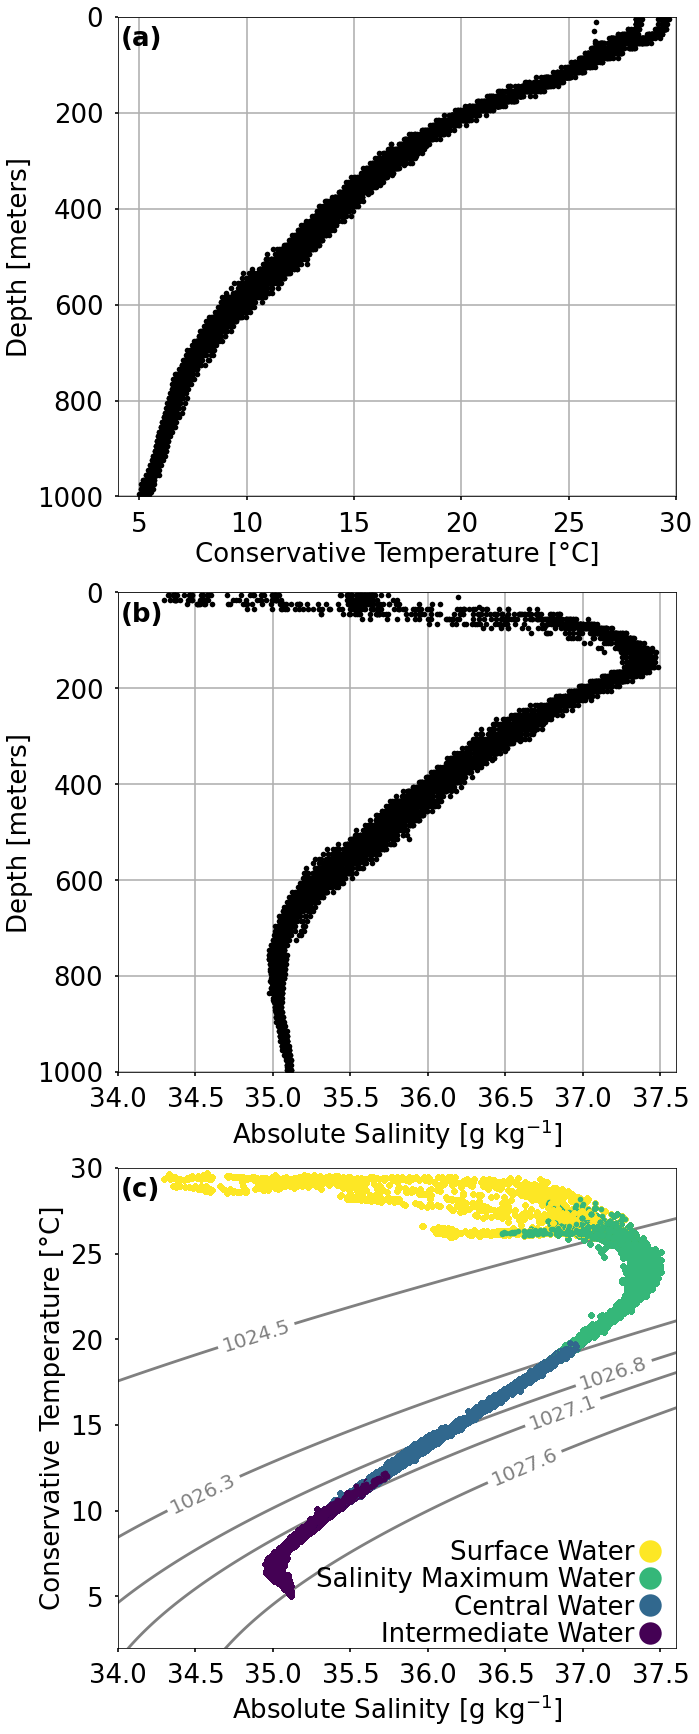

In [39]:
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
cmap = matplotlib.cm.get_cmap('viridis')

fig, axs = plt.subplots(3, 1, figsize=(10, 30))

font_size = 26

axs[0].plot(np.nanmean(grid_ds_2020.temp,axis=(1,2)),grid_ds_2020.depth,'.',color='black')
axs[0].plot(grid_ds_2021a.temp,grid_ds_2021a.depth,'.',color='black')
axs[0].plot(grid_ds_2021b.temp,grid_ds_2021b.depth,'.',color='black')
axs[0].plot(np.nanmean(grid_ds_2022.temp,axis=(1,2)),grid_ds_2022.depth,'.',color='black')
axs[0].grid()
axs[0].tick_params(axis='both', which='major', labelsize=font_size)
axs[0].set_xlabel('Conservative Temperature [°C]',fontsize=font_size)
axs[0].set_ylabel('Depth [meters]',fontsize=font_size)
axs[0].set_xlim(4,30)
axs[0].set_ylim(1000,0)
axs[0].text(0.005,0.94,'(a)', transform=axs[0].transAxes, size=font_size, weight='bold')

axs[1].plot(np.nanmean(grid_ds_2020.sal,axis=(1,2)),grid_ds_2020.depth,'.',color='black')
axs[1].plot(grid_ds_2021a.sal,grid_ds_2021a.depth,'.',color='black')
axs[1].plot(grid_ds_2021b.sal,grid_ds_2021b.depth,'.',color='black')
axs[1].plot(np.nanmean(grid_ds_2022.sal,axis=(1,2)),grid_ds_2022.depth,'.',color='black')
axs[1].grid()
axs[1].tick_params(axis='both', which='major', labelsize=font_size)
axs[1].set_xlabel('Absolute Salinity [g kg$^{-1}$]',fontsize=font_size)
axs[1].set_ylabel('Depth [meters]',fontsize=font_size)
axs[1].set_xlim(34,37.6)
axs[1].set_ylim(1000,0)
axs[1].set_xticks([34,34.5,35,35.5,36,36.5,37,37.5])
axs[1].text(0.005,0.94,'(b)', transform=axs[1].transAxes, size=font_size, weight='bold')

axs[2].plot(grid_ds_2020.sal.values[surface_ind_2020].flatten(),grid_ds_2020.temp.values[surface_ind_2020].flatten(),'.',label='Surface Water',color=cmap(0.999))
axs[2].plot(grid_ds_2020.sal.values[salinity_max_ind_2020].flatten(),grid_ds_2020.temp.values[salinity_max_ind_2020].flatten(),'.',label='Salinity Maximum Water',color=cmap(0.666))
axs[2].plot(grid_ds_2020.sal.values[central_water_ind_2020].flatten(),grid_ds_2020.temp.values[central_water_ind_2020].flatten(),'.',label='Central Water',color=cmap(0.333))
axs[2].plot(grid_ds_2020.sal.values[int_water_ind_2020].flatten(),grid_ds_2020.temp.values[int_water_ind_2020].flatten(),'.',label='Intermediate Water',color=cmap(0.001))

axs[2].plot(grid_ds_2021a.sal.values[surface_ind_2021a].flatten(),grid_ds_2021a.temp.values[surface_ind_2021a].flatten(),'.',color=cmap(0.999))
axs[2].plot(grid_ds_2021a.sal.values[salinity_max_ind_2021a].flatten(),grid_ds_2021a.temp.values[salinity_max_ind_2021a].flatten(),'.',color=cmap(0.666))
axs[2].plot(grid_ds_2021a.sal.values[central_water_ind_2021a].flatten(),grid_ds_2021a.temp.values[central_water_ind_2021a].flatten(),'.',color=cmap(0.333))
axs[2].plot(grid_ds_2021a.sal.values[int_water_ind_2021a].flatten(),grid_ds_2021a.temp.values[int_water_ind_2021a].flatten(),'.',color=cmap(0.001))

axs[2].plot(grid_ds_2021b.sal.values[surface_ind_2021b].flatten(),grid_ds_2021b.temp.values[surface_ind_2021b].flatten(),'.',color=cmap(0.999))
axs[2].plot(grid_ds_2021b.sal.values[salinity_max_ind_2021b].flatten(),grid_ds_2021b.temp.values[salinity_max_ind_2021b].flatten(),'.',color=cmap(0.6666))
axs[2].plot(grid_ds_2021b.sal.values[central_water_ind_2021b].flatten(),grid_ds_2021b.temp.values[central_water_ind_2021b].flatten(),'.',color=cmap(0.333))
axs[2].plot(grid_ds_2021b.sal.values[int_water_ind_2021b].flatten(),grid_ds_2021b.temp.values[int_water_ind_2021b].flatten(),'.',color=cmap(0.001))

axs[2].plot(grid_ds_2022.sal.values[surface_ind_2022].flatten(),grid_ds_2022.temp.values[surface_ind_2022].flatten(),'.',color=cmap(0.999))
axs[2].plot(grid_ds_2022.sal.values[salinity_max_ind_2022].flatten(),grid_ds_2022.temp.values[salinity_max_ind_2022].flatten(),'.',color=cmap(0.6666))
axs[2].plot(grid_ds_2022.sal.values[central_water_ind_2022].flatten(),grid_ds_2022.temp.values[central_water_ind_2022].flatten(),'.',color=cmap(0.333))
axs[2].plot(grid_ds_2022.sal.values[int_water_ind_2022].flatten(),grid_ds_2022.temp.values[int_water_ind_2022].flatten(),'.',color=cmap(0.001))

#axs[2].grid()
axs[2].tick_params(axis='both', which='major', labelsize=font_size)
axs[2].set_ylabel('Conservative Temperature [°C]',fontsize=font_size)
axs[2].set_xlabel('Absolute Salinity [g kg$^{-1}$]',fontsize=font_size)
axs[2].set_ylim(2,30)
axs[2].set_xlim(34,37.6)
axs[2].set_xticks([34,34.5,35,35.5,36,36.5,37,37.5])

######## This plots the contours
mint=1
maxt=30
mins=34
maxs=37.5
tempL=np.linspace(mint-1,maxt+1,399)
salL=np.linspace(mins-1,maxs+1,399)
Tg, Sg = np.meshgrid(tempL,salL)

z=np.linspace(-1000,0,399)
p = gsw.p_from_z(z,lat=0)

sigma_theta = gsw.sigma0(Sg, Tg)+1000

#sigma_theta = gsw.sigma0(Sg, Tg)+1000 # ignore effects of pressure on density
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(),399)
ind = np.argwhere(sigma_theta > 1015.7)
st_short = sigma_theta[ind]
cs = axs[2].contour(Sg, Tg, sigma_theta, colors='grey', zorder=1 ,levels=[1024.5,1026.3,1026.8,1027.1,1027.6])
levels = cs.levels
manual_locations = [(34.9, 20), (34.5, 12), (37.2,18), (36.9,15), (36.65,12)]
axs[2].clabel(cs,levels, fontsize=20,inline=True,fmt='%.1f', manual=manual_locations)



axs[2].text(0.005,0.94,'(c)', transform=axs[2].transAxes, size=font_size, weight='bold')
axs[2].legend(fontsize=font_size,markerscale=4,frameon=False,markerfirst=False,loc='lower right',handletextpad=-0.3, labelspacing=0.05,borderaxespad=-0.4)


plt.savefig('/home/jg1200/Figures/Anegada_Dominant_Water_Masses.png', bbox_inches='tight',dpi=300,facecolor='white')



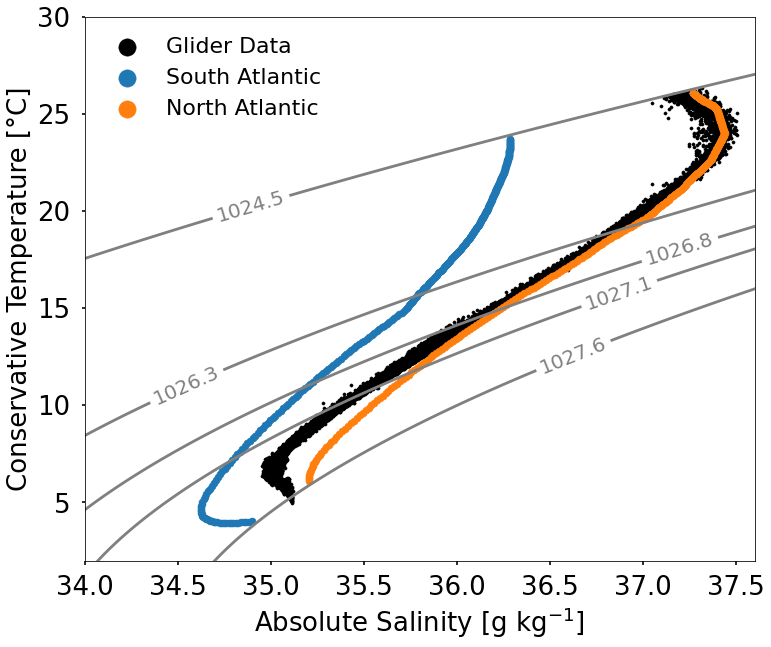

In [32]:
 plt.figure(figsize=(12, 10))

font_size = 26

s = 50

## markersize
plt.scatter(subset_ds_2020.sal.values,subset_ds_2020.temp.values,s=10,c='black',label='Glider Data')
plt.scatter(subset_ds_2021a.sal.values,subset_ds_2021a.temp.values,s=10,c='black')
plt.scatter(subset_ds_2021b.sal.values,subset_ds_2021b.temp.values,s=10,c='black')
plt.scatter(subset_ds_2022.sal.values,subset_ds_2022.temp.values,s=10,c='black')

## SAW
plt.scatter(df.saw_sal,df.saw_temp,s=s,label='South Atlantic')
## NAW
plt.scatter(df.naw_sal,df.naw_temp,s=s,label='North Atlantic')


plt.gca().tick_params(axis='both', which='major', labelsize=font_size)
plt.ylabel('Conservative Temperature [°C]',fontsize=font_size)
plt.xlabel('Absolute Salinity [g kg$^{-1}$]',fontsize=font_size)
plt.ylim(2,30)
plt.xlim(34,37.6)

# lgnd = axs[1,1].legend(fontsize=font_size,frameon=False,loc='lower right',markerfirst=False,handletextpad=-0.25, labelspacing=0.075,borderaxespad=-0.3)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([500])

######## This plots the contours
mint=1
maxt=30
mins=34
maxs=37.5
tempL=np.linspace(mint-1,maxt+1,399)
salL=np.linspace(mins-1,maxs+1,399)
Tg, Sg = np.meshgrid(tempL,salL)

z=np.linspace(-1000,0,399)
p = gsw.p_from_z(z,lat=0)

sigma_theta = gsw.sigma0(Sg, Tg)+1000

#sigma_theta = gsw.sigma0(Sg, Tg)+1000 # ignore effects of pressure on density
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(),399)
ind = np.argwhere(sigma_theta > 1015.7)
st_short = sigma_theta[ind]
cs = plt.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1 ,levels=[1024.5,1026.3,1026.8,1027.1,1027.6])
levels = cs.levels
manual_locations = [(34.9, 20), (34.5, 12), (37.2,18), (36.9,15), (36.65,12)]
plt.clabel(cs,levels, fontsize=20,inline=True,fmt='%.1f', manual=manual_locations)

lgnd = plt.legend(frameon=False,loc='upper left',fontsize=22)
for handle in lgnd.legendHandles:
    handle.set_sizes([300])


plt.savefig('/home/jg1200/Figures/Anegada_SAW_NAW_End_Members.png', bbox_inches='tight',dpi=300,facecolor='white')



## Plot transport per temperature class

In [19]:
ranges2020 = pd.read_csv('/home/jg1200/Data/GliderData/RU29/transport_per_temperature_class_2020.csv')
## Saved in a weird format
ranges2020 = np.array(ranges2020)[0][1:]

ranges2021a = pd.read_csv('/home/jg1200/Data/GliderData/RU29/transport_per_temperature_class_jul_2021.csv')
## Saved in a weird format
ranges2021a = np.array(ranges2021a)[0][1:]


ranges2021b = pd.read_csv('/home/jg1200/Data/GliderData/RU29/transport_per_temperature_class_sep_2021.csv')
## Saved in a weird format
ranges2021b = np.array(ranges2021b)[0][1:]

ranges2022 = pd.read_csv('/home/jg1200/Data/GliderData/RU36/transport_per_temperature_class_2022.csv')
## Saved in a weird format
ranges2022 = np.array(ranges2022)[0][1:]

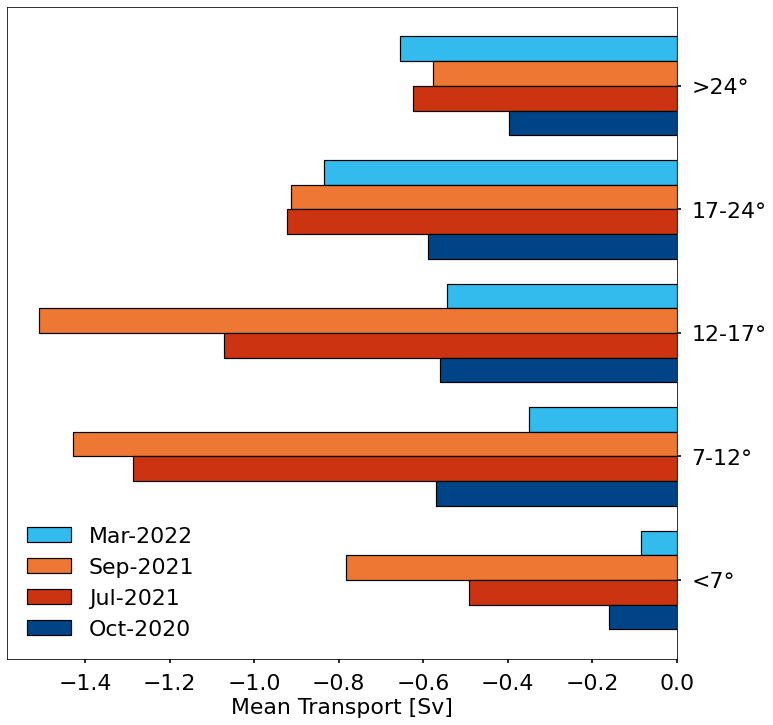

In [20]:
#create the base axis to add the bars to
fig, ax = plt.subplots(1,1, figsize = (12,12))

range_names = ['<7\N{DEGREE SIGN}', '7-12\N{DEGREE SIGN}', '12-17\N{DEGREE SIGN}', '17-24\N{DEGREE SIGN}', '>24\N{DEGREE SIGN}']
#use this to create x ticks to add the data to
y = np.array((0,2,4,6,8))
height = 0.4

# oct_2020_color = '#0077BB'
# jul_2021_color = '#BB5566'
# sep_2021_color = '#DDAA33'
# mar_2022_color = '#009988'

font_size = 22

oct_2020_color = '#004488'
jul_2021_color = '#CC3311'
sep_2021_color = '#EE7733'
mar_2022_color = '#33BBEE'

rect1 = ax.barh(y+0.6, ranges2022, height = height, label = 'Mar-2022', color=mar_2022_color, edgecolor='black', linewidth=1.2)
rect2 = ax.barh(y+0.2, ranges2021b, height = height, label = 'Sep-2021', color=sep_2021_color, edgecolor='black', linewidth=1.2)
rect3 = ax.barh(y-0.2, ranges2021a, height = height, label = 'Jul-2021', color=jul_2021_color, edgecolor='black', linewidth=1.2)
rect4 = ax.barh(y-0.6, ranges2020, height = height, label = 'Oct-2020',    color=oct_2020_color, edgecolor='black', linewidth=1.2)

ax.set_yticks(y)
ax.set_yticklabels(range_names)
plt.xlabel('Mean Transport [Sv]', fontsize = font_size)
plt.gca().yaxis.tick_right()
ax.tick_params(labelsize=font_size) 


# ###### To change the order of elements plotted in legend so it is chronological
# #get handles and labels
# handles, labels = plt.gca().get_legend_handles_labels()

# #specify order of items in legend
# order = [3,2,1,0]

# #add legend to plot
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], frameon=False, loc='lower left') 

plt.legend(frameon=False, loc='lower left', fontsize = font_size)

plt.savefig('/home/jg1200/Figures/All_Deployments_Transport_Temperature_Layers_Colored.png',dpi=300,facecolor='white',bbox_inches='tight')


In [21]:
def calc_saw_percentages(df):
    return(df[1]+(df[2]*0.25)+(df[3]*0.25)+df[4])
    

In [22]:
calc_saw_percentages(ranges2020)

-1.2516704845088287

In [23]:
calc_saw_percentages(ranges2021a)

-2.4086211018502524

In [24]:
calc_saw_percentages(ranges2021b)

-2.6100755970995406

In [25]:
calc_saw_percentages(ranges2022)

-1.348894125122908

In [26]:
1.25/0.58

2.1551724137931036

In [27]:
2.41/1.43

1.6853146853146854

In [28]:
2.63/1.96

1.3418367346938775

In [29]:
1.36/0.47

2.893617021276596